# Feature Engineering: Feature Creation

### Read in text

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth',100)
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['Label', 'Text']

In [2]:
data.head()

,Label,Text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [21]:
data['Label'].value_counts()

ham     4821
spam     746
Name: Label, dtype: int64

### Create feature for text message length

### Hypotheses that spam messages are longer than the normal text message

In [4]:
data['body_length'] = data['Text'].apply(lambda x: len(x) - x.count(" "))
# we have to remove the white spaces to get the exact count of characters
# Example: There is a text with 9 spaces and 1 character, so it is different from text with all 10 characters

data.head()

,Label,Text,body_length
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


### Create feature for % of text that is punctuation

### Hypotheses that real text messages contains less punctuation than spam messages

In [6]:
import string
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    # returning 1 if a character in a single text is equal to punctuation and summing it to get the count of punctuations
    perc = round(count/(len(text)-text.count(" ")),3)*100
    # calculating percentage of punctuations in each text
    # number of punctuation/ total number of characters in a text except for white spaces
    return(perc)
data['punct_percentage'] = data['Text'].apply(lambda x: count_punc(x))
data.head()

,Label,Text,body_length,punct_percentage
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


- There can be many new features that can be created.
- It is good to extract more value from the data
- These features help to predict more about the class labels and give more insights that which text is spam or normal text

### Evaluate created features

In [13]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

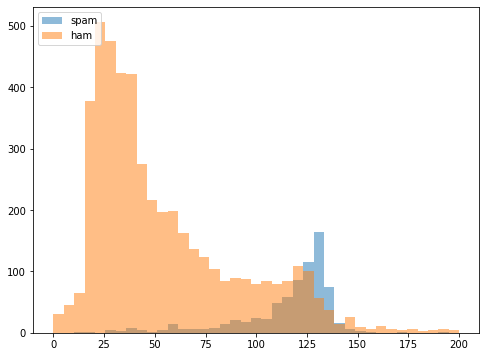

In [15]:
# For body_length
bins = np.linspace(0,200,40) # array with 40 evenly spaced numbers between 0 and 200
plt.figure(figsize=(8,6))
plt.hist(data[data['Label']=='spam']['body_length'], bins, alpha =0.5,label='spam') # distribution for body length for spam
# alpha for shading
# normed=True means that all the data is in normalised form to the same scale
plt.hist(data[data['Label']=='ham']['body_length'],bins,alpha=0.5, label='ham')# distribution of body length for not spam
plt.legend(loc='upper left')

- This shows that body length is more for spam text than ham
- This means that there is more text in the spam messages than the ham messages
- So, this extra feature- body_length is really helpful for our model to distinguish between ham and spam

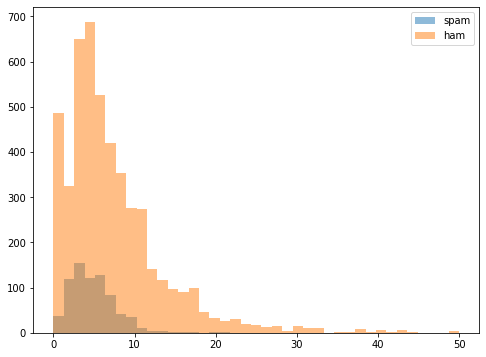

In [20]:
# For percentage of punctuations

bins = np.linspace(0,50,40) # Assuming that there is not more than 50% of punctuation in a text
plt.figure(figsize=(8,6))
plt.hist(data[data['Label']=='spam']['punct_percentage'], bins, alpha=0.5, label='spam')
plt.hist(data[data['Label']=='ham']['punct_percentage'],bins,alpha=0.5, label='ham')
plt.legend(loc='upper right')

- This shows that there is not much difference in the percentage of punctuation in the ham and spam text
- This feature might not give much value as both are nearly same
- We cannot say that there are more number of puntuations in the spam text than ham text
- So hypotheses defined for percentage of punctuation in spam is more than in ham is FALSE